In [1]:
%matplotlib widget

In [2]:
import xtrack as xt

### Load lattice

In [3]:
env = xt.load_madx_lattice('clic_dr.madx')

In [4]:
# Inspect lines
env.lines

{'ring': <Line ring at 5302570256>}

In [5]:
# select a line and define reference particle
line = env.ring
line.particle_ref = xt.Particles(mass0=xt.ELECTRON_MASS_EV, p0c=2.86e9)

### Survey

In [6]:
sv = line.survey()

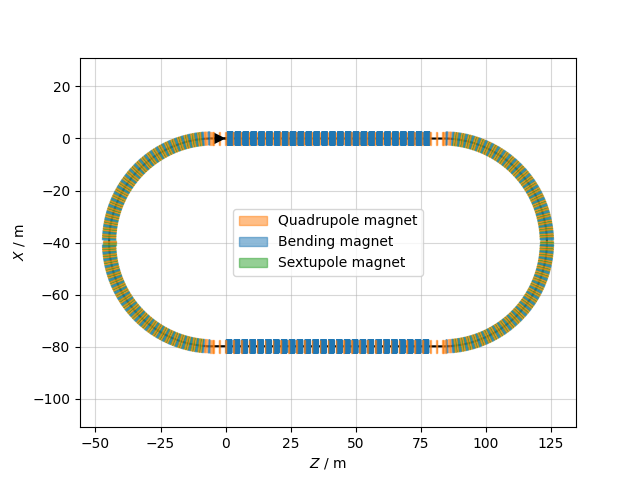

In [7]:
sv.plot() # takes some time (wigglers)...

### Twiss 4d

In [8]:
tw = line.twiss4d()

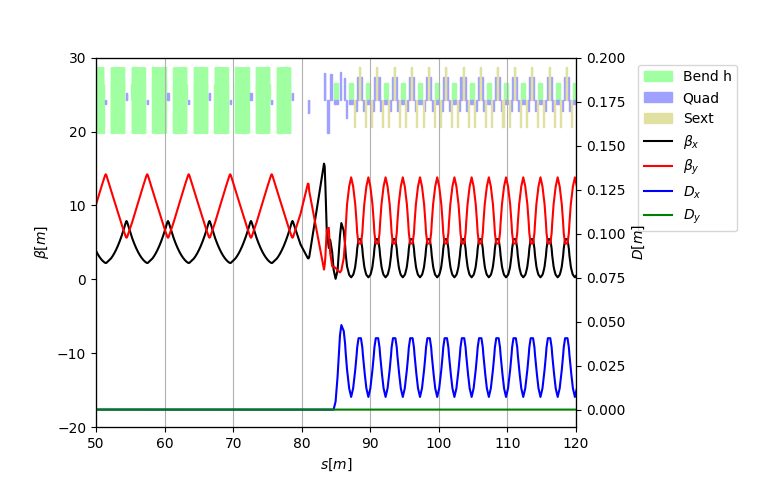

In [9]:
pl = tw.plot()
pl.ylim(left_lo=-20, left_hi=30, right_lo=-0.01, right_hi=0.2, lattice_hi=1.3, lattice_lo=-10)
pl.xlim(50, 120)

### Twiss 6d

In [10]:
tw6d = line.twiss()

In [11]:
tw6d.qs

0.009546848244939343

### Radiation

In [15]:
line.configure_radiation(model='mean')

In [16]:
tw_rad = line.twiss(eneloss_and_damping=True)

In [17]:
# Energy loss per turn [eV]
tw_rad.eneloss_turn

3981826.919666951

In [18]:
# Partition numbers
tw_rad.partition_numbers

array([1.02711502, 1.00000209, 1.97164792])

In [19]:
# Equilibrium emittances
tw_rad.eq_gemitt_x, tw_rad.eq_gemitt_y, tw_rad.eq_gemitt_zeta

(8.6911913533983e-11, 5.968014921273472e-54, 1.5333362459925546e-06)

In [20]:
# Momentum deviation along the ring 
tw.plot('delta'